# 岭回归（Ridge Regression）

### 选用数据集：wine数据集[UCI Machine Learning Repository: Wine Data Set]
#### 数据库网址：https://archive.ics.uci.edu/ml/machine-learning-databases/housing/   
##### 下载housing.data即可，以下代码就是load该数据文件，之后做岭回归

注：数据集来自卡内基梅隆大学维护的 StatLib 库。样本包含 1970 年代的在波士顿郊区不同位置的房屋信息，总共有 13 种房屋属性。 目标值是一个位置的房屋的中值（单位：k$）。

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Boston_housing数据集加载与预处理
### 数据集读入

In [2]:
fd = pd.read_csv("housing.data", header = None)
tmp = []
for i, d in enumerate(fd.values):
    d = map(float, filter(lambda x : x != '', d[0].split(' ')))
    tmp.append(list(d))
df_origin = pd.DataFrame(tmp)
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDV']
df_origin.columns = names
print("可视化数据集的前5行！")
df_origin.head(5)

可视化数据集的前5行！


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 数据清洗

In [3]:
# 数据清洗
df_origin.dropna(inplace=True)
print("数据集shape:")
print(df_origin.shape)

数据集shape:
(506, 14)


### 数据标准化
注：之所以标准化，是因为岭回归算法需要！

In [4]:
def Standardization(x, mean, std):
    return (x - mean) / std

df = df_origin
for col in list(df):
    df[col] = Standardization(df[col], df.describe()[col]['mean'], df.describe()[col]['std'])

print("标准化后的数据集的前5行：")
df.head(5)

标准化后的数据集的前5行：


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDV
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


## 岭回归算法实现
根据课上所学的，经验风险损失函数是平方误差函数、外加对参数的L2正则化惩罚项：
$\sum_{i=1}^{n}\left(y_{i}-\sum_{j=0}^{p} w_{j} x_{i j}\right)^{2}+\lambda \sum_{j=0}^{p} w_{j}^{2}$

对W求导，可以求出解析解：
$W^{\prime}=\left(X^{T} X+\lambda I\right)^{-1} X^{T} Y$

其实可以看见$+\lambda I$之后可以达到防止最小二乘法解析解矩阵奇异进而无逆的效果

In [5]:
def Ridge_Regression(X,Y,lambdaa):
    W = np.matmul(np.linalg.inv(np.matmul(X.T, X) + lambdaa * np.eye(np.shape(X)[1])), np.matmul(X.T, Y))
    return W

## 岭迹图（不同lambda的影响）

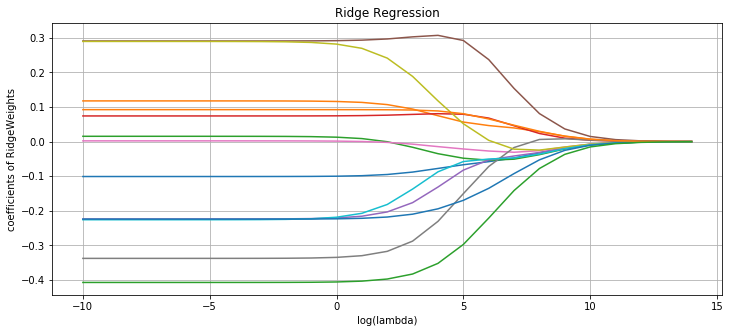

In [6]:
X = df.values[:,:-1]
Y = df.values[:,-1]
RidgeWeights = np.zeros((25,np.shape(X)[1]))
for i,log_lambdaa in enumerate(range(-10, 15)):
    RidgeWeights[i,:] = Ridge_Regression(X, Y, np.exp(log_lambdaa))

fig = plt.figure(figsize=(12,5))
plt.title('Ridge Regression')
plt.xlabel("log(lambda)")
plt.ylabel("coefficients of RidgeWeights")
plt.grid()
plt.plot(range(-10, 15), RidgeWeights)
plt.show()

### 分析解释：
1、岭参数lambda越大，参数会越来越趋近于0（因为惩罚权重越大，参数只能越小）

2、另外岭参数lambda为0，会退化为最小二乘解（因为就是最小二乘解的形式）

## 回归结果展示
做法：划分75%的条目作为训练集，用岭回归计算参数W，再在剩下的25%作为测试集的数据上做可视化看效果如何

### 训练集测试集划分
训练集:测试集 = 75:25

In [7]:
#75%训练集
train_df = df.sample(frac=0.75, random_state=0)
#剩下的是测试集
test_df = df[~df.index.isin(train_df.index)]
train_df.shape, test_df.shape

((380, 14), (126, 14))

### 在测试集上可视化结果
注：由于一共有13个属性（自变量），不可能在一张图中将13个自变量都展示出来，这里我只随便展示了一个自变量LSTAT（lower status of the population ）的取值，已经可以看出回归的效果了（如果感兴趣完全可以改成另外12个自变量，都有明显的回归效果）

lambda=0.01时（红色点为预测点，蓝色点为测试点）：


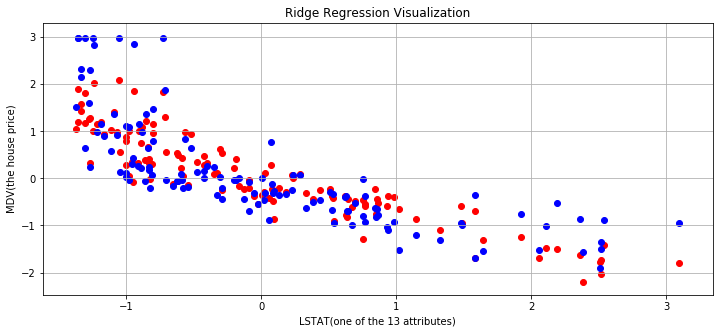

lambda=10时（红色点为预测点，蓝色点为测试点）：


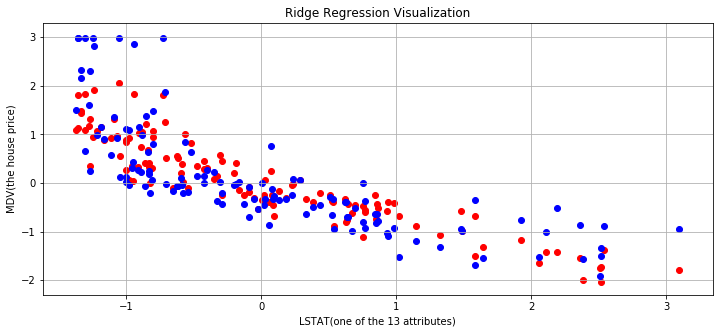

lambda=100000时（红色点为预测点，蓝色点为测试点）：


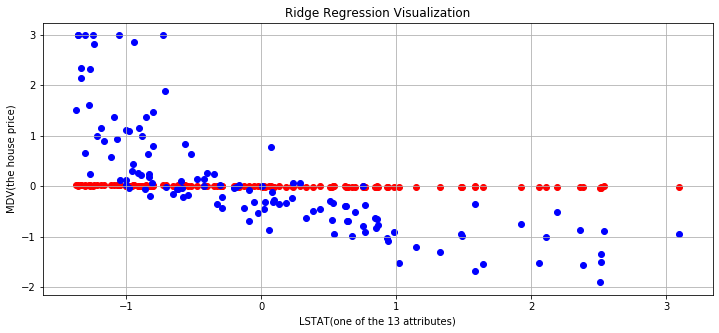

In [8]:
def visualization(test_df, RidgeWeights, df_origin):
    fig = plt.figure(figsize=(12,5))
    plt.title('Ridge Regression Visualization')
    plt.xlabel("LSTAT(one of the 13 attributes)")
    plt.ylabel("MDV(the house price)")

    plt.grid()
    x = test_df.values[:,:-1]
    y = np.sum(RidgeWeights * x, axis=1) * df_origin.describe()['MDV']['std'] + df_origin.describe()['MDV']['mean']

    plt.scatter(test_df['LSTAT'].values, y, c='red')
    plt.scatter(test_df['LSTAT'].values, test_df['MDV'].values, c='blue')
    plt.show()

X = train_df.values[:,:-1]
Y = train_df.values[:,-1]
# lambda = 0.01时
RidgeWeights = Ridge_Regression(X, Y, 0.01)
print("lambda=0.01时（红色点为预测点，蓝色点为测试点）：")
visualization(test_df, RidgeWeights, df_origin)
# lambda = 10时
RidgeWeights = Ridge_Regression(X, Y, 10)
print("lambda=10时（红色点为预测点，蓝色点为测试点）：")
visualization(test_df, RidgeWeights, df_origin)
# lambda = 100000时
RidgeWeights = Ridge_Regression(X, Y, 100000)
print("lambda=100000时（红色点为预测点，蓝色点为测试点）：")
visualization(test_df, RidgeWeights, df_origin)

### 分析：
只用了75%的数据进行回归，对剩下的25%的数据进行预测。从可视化结果来看，在岭系数lambda在合理返回内时表现挺好的，对于即使没见过的样本也能回归得比较准确（如前两张图）；而岭系数lambda过大时，跟之前岭迹图分析的一样，因为惩罚权重越大，参数只能越小，此时参数都会趋向于0，回归效果很差（如最后一张图）